In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malignant-comment-classification/train.csv
/kaggle/input/malignant-comment-classification/test.csv


In [2]:
#burada kullanacağımız kütüphaneleri çağırıyoruz
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))
import nltk as nlp

In [3]:
#test veri setini çağırıyoruz

data_test=pd.read_csv('/kaggle/input/malignant-comment-classification/test.csv')
data_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
#önce veri setini çağırdım sonra eğitmek için gereken şekilde yeni bir malıgnat sütunu oluturduktan sonra kullanmayacağım kısımları çıkardım .

data_train=pd.read_csv('/kaggle/input/malignant-comment-classification/train.csv')
data_train1=data_train

data_train["labels"] = data_train["malignant"].map({0: "No Hate and Offensive", 
                                                    1: "Offensive Language"  } )

#başka bir seçenek
#data_train["labels"] = [ "No Hate and Offensive" if each ==0  else "Offensive Language" for each in data_train["malignant"]]


data_train = data_train[["comment_text", "labels"]]

data_train.head()

,comment_text,labels
0,Explanation\nWhy the edits made under my usern...,No Hate and Offensive
1,D'aww! He matches this background colour I'm s...,No Hate and Offensive
2,"Hey man, I'm really not trying to edit war. It...",No Hate and Offensive
3,"""\nMore\nI can't make any real suggestions on ...",No Hate and Offensive
4,"You, sir, are my hero. Any chance you remember...",No Hate and Offensive


In [5]:
data_train.comment_text[data_train.labels=="Offensive Language"]

6              COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
12        Hey... what is it..\n@ | talk .\nWhat is it......
16        Bye! \n\nDon't look, come or think of comming ...
42        You are gay or antisemmitian? \n\nArchangel WH...
43                 FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
                                ...                        
159494    "\n\n our previous conversation \n\nyou fuckin...
159514                    YOU ARE A MISCHIEVIOUS PUBIC HAIR
159541    Your absurd edits \n\nYour absurd edits on gre...
159546    "\n\nHey listen don't you ever!!!! Delete my e...
159554    and i'm going to keep posting the stuff u dele...
Name: comment_text, Length: 15294, dtype: object

In [6]:
#burada veri setinin düzgün okunması için gerekli olan temizleme ve düzenlemeler yapıldı .

def cleaning(data):
    absolve_list = []
    
    for absolve in data:
        absolve = re.sub("[^a-zA-Z]"," ",absolve)
        absolve = absolve.lower()   # converting from uppercase to lowercase
        absolve = nltk.word_tokenize(absolve)
        lemma = nlp.WordNetLemmatizer()
        absolve = [ lemma.lemmatize(word) for word in absolve]
        absolve = " ".join(absolve)
        absolve_list.append(absolve)
        
    return absolve_list



In [7]:
#eğitim setindeki eğiteceğimiz datanın uygun hale gelmesi için gereken temizlik yapıldı .
data_train["comment_text"] = cleaning(data_train.comment_text)

#test datasının temizliği yapıldı
data_test['new_comment_text'] = cleaning(data_test.comment_text)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
#buradada şuç tespiti için verinin eğitimini yapıyoruz .

x = np.array(data_train["comment_text"])
y = np.array(data_train["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
print("decision tree değeri: ", clf.score(X_test,y_test))

#decision tree score:  0.9445088516371613


decision tree değeri:  0.9443098262032086


In [9]:
#buradada daha iyi sonuç alabilmek için RandomForestClassifier'ı deneyelim
#çok fazla zaman aldığı için burada çalıştırmadım .


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(X_train,y_train)
print("random forest değeri: ",rf.score(X_test,y_test))

#random forest algo result:  0.9412501958326805

#burada görüldüğü üzere forest sonucu tree sonucundan düşük kaldı .
#bu yüzden tree kullanımı bizim için daha iyi olur .

random forest değeri:  0.9425969251336899


In [10]:
#buradan eğittiğimiz data setin sonuçlarına bakalım .

import random

a=random.sample(range(1,len(data_test["new_comment_text"])),6)

for i in range(5):
    data_train = cv.transform([data_test["new_comment_text"][a[i]]]).toarray()
    print(data_test["new_comment_text"][a[i]]+"  ----  "+clf.predict(data_train))
    print(" ")



['if there s any sort of consensus with regard to the content i must ve missed it most of what s been said is about whether to italicise his name hyphenate some word and change the tense of a verb  ----  No Hate and Offensive']
 
['speedy deletion of leon england a tag ha been placed on leon england requesting that it be speedily deleted from wikipedia this ha been done under section a of the criterion for speedy deletion because the article appears to be about a person or group of people but it doe not indicate how or why the subject is notable that is why an article about that subject should be included in an encyclopedia under the criterion for speedy deletion article that do not indicate the subject s importance or significance may be deleted at any time please see the guideline for what is generally accepted a notable a well a our subject specific notability guideline for biography if you think that this notice wa placed here in error you may contest the deletion by adding to the 

In [11]:
#eğitim datasetindeki verileri oluşturduğumuz makine öğrenmesine göre toplam sayıları .

Offensive_score=0
No_Offensive_score=0

for i in data_test["new_comment_text"]:
    data_train = cv.transform([i]).toarray()
    
    if clf.predict(data_train)=='No Hate and Offensive':
        No_Offensive_score+=1
    else:
        Offensive_score+=1
        
import plotly.express as px
fig = px.bar( x=["No Offensive score","Offensive score","total"],y=[No_Offensive_score,Offensive_score,No_Offensive_score+Offensive_score])
fig.show()

In [12]:
#burada sadece hakaret içerikli mesajları içeren veri kümesini alıyoruz .

data_malignat=data_train1[data_train1["malignant"]==1]

data_malignat1=data_malignat #burada yaptığımız değişikliklerde veri setimiz zarar görmesin diye yedek dataset üzerinde çalışıyoruz 

data_malignat=data_train1["malignant"]

In [13]:
absolve_list_malignant = cleaning(data_malignat1.comment_text) 

In [14]:
#hakaret içerikli mesajlar içerisinde en çok kullanılan 50 kelimeyi sıralıyoruz .

from sklearn.feature_extraction.text import CountVectorizer 
max_features = 50

count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(absolve_list_malignant).toarray()  # x

print("{} most frequently used words: {}".format(max_features,count_vectorizer.get_feature_names()))

50 most frequently used words: ['article', 'asshole', 'ball', 'bark', 'bitch', 'block', 'bullshit', 'cock', 'cunt', 'dick', 'did', 'die', 'don', 'dont', 'fag', 'faggot', 'fat', 'fuck', 'fucking', 'gay', 'ha', 'hate', 'hi', 'idiot', 'jew', 'just', 'know', 'life', 'like', 'make', 'moron', 'nigger', 'page', 'penis', 'people', 'pig', 'right', 'shit', 'stop', 'stupid', 'suck', 'talk', 'think', 'time', 'user', 'wa', 'wanker', 'want', 'wiki', 'wikipedia']


In [15]:
#veri setinde en çok kullanılan anlamlı veya anlamsız kelimelerin sayısı .
#buradan en çok kullanılan 50 kelimenin sayısını bulacaz .

seri = pd.Series(absolve_list_malignant, copy=False)
words=[]

for i in range(15294):
    m=seri[i].split(" ")
    for x in range(len(m)):
        words.append(m[x])
        
series = pd.Series(words, copy=False)
series.value_counts()



you             38926
a               23559
i               23317
the             20610
and             15778
                ...  
br                  1
ast                 1
daisy               1
ykick               1
mischievious        1
Length: 29191, dtype: int64

In [16]:
#burasıda en çok kullanılan 50 kelimenin sayılarını bulmak için oluşturuldu .

the_words=count_vectorizer.get_feature_names()

number_of_repetitions =[x for x in range(50)]

for k in range(50):
    for i in series:
        if i==the_words[k]:
            number_of_repetitions[k]+=1

In [17]:
#şimdide daha rahat anlaşılması için tekrar sayılarını görsele döküyoruz .

x=count_vectorizer.get_feature_names()
y=number_of_repetitions

fig = px.pie(values=y, names=x)
fig.show()

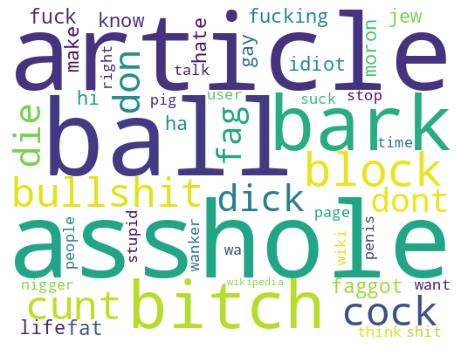

In [18]:
#en çok kullanılan 50 kelimenin kelime haritasına bakalım ve bitirelim  .
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(x))
plt.imshow(wordcloud) 
plt.axis('off')
plt.savefig('Plotly-World_Cloud.png')
plt.show()